# 1. Problema de ordenamiento

**Entrada**: Secuencia de $n$ números $[a_1, a_2, ..., a_n]$, con $n \in \mathbb{N}$.

**Salida**: Permutación ordenada de la secuencia de entrada $[a_1', a_2', ..., a_n']$ tal que $a_1' \leq a_2' \leq ... \leq a_n'$

# 1.1 InsertionSort

El siguiente código muestra una implementación del algoritmo **InsertionSort**.

### 1.1.1 Código

In [1]:
def insertionSort(arr, verbose=False):
    n = len(arr)
    c = 0 # Contador de comparaciones
    if verbose == True:
        print('\nInput array:', arr)
    # Se recorre el arreglo
    for i in range(1, n):
        c += 1
        if verbose == True:
            print('\nPasada', i)
        elemento = arr[i]
        j = i-1
        # Cambia la posición del elemento si es menor que su predecesor
        while j >= 0 and elemento < arr[j]:
            c += 1
            arr[j+1] = arr[j]
            j -= 1
        arr[j+1] = elemento
        if verbose == True:
            print('\nArray:', arr)
    if verbose == True:
        print('\nDone')
    return arr, c

# Ejemplo
a = [4,1,8,5,7,3]
print('Entrada:',a)
a, c = insertionSort(a)
print('Salida:',a)
print('Comparaciones:', c)

Entrada: [4, 1, 8, 5, 7, 3]
Salida: [1, 3, 4, 5, 7, 8]
Comparaciones: 12


### 1.1.2 Descripción del algoritmo

El algoritmo recibe como entrada una lista (o arreglo) con la secuencia de elementos que queremos ordenar. Luego, los números se ordenan dentro de la misma lista.

1. Los elementos de la lista se recorren desde la posición 1 hasta la posición $n$ (no desde el primer elemento, ya que éste no posee predecesor).
2. Si el elemento `a[i]` es mayor que su predecesor, no necesita ser movido.
3. Si el elemento `a[i]` es menor que su predecesor, debe ser movido hacia la izquierda hasta que su elemento predecesor sea menor, o llegar al inicio de la lista.
4. Al finalizar, se retorna el arreglo ordenado y un contador `c` que indica la cantidad de comparaciones totales.

Siempre se recorre el arreglo completo menos su primer elemento, independiente de su largo.

### 1.1.3 Ejemplo

Tomando como ejemplo el arreglo anterior:

$a$ = [4, 1, 8, 5, 7, 3]

En la primera iteración, se compara el elemento a[1], que corresponde al 1 con el elemento anterior, a[0], el 4. Como 1 < 4, intercambian sus posiciones.

$a$ = [1, 4, 8, 5, 7, 3]

Luego, se compara el 8 con el 4. Como 8 > 4, no intercambian posiciones.

$a$ = [1, 4, 8, 5, 7, 3]

La siguiente comparación es entre el 5 y el 8. Como 5 < 8, intercambian sus posiciones.

$a$ = [1, 4, 5, 8, 7, 3]

Lo mismo ocurre con el 7 y el 8.

$a$ = [1, 4, 5, 7, 8, 3]

Finalmente, el programa ejecuta las siguientes comparaciones: 3 < 8, 3 < 7, 3 < 5, 3 < 4, 3 > 1, con lo que se obtiene que el 3 intercambia posiciones con todos los elementos menos el 1 y así se obtiene el siguiente arreglo:

$a$ = [1, 3, 4, 5, 7, 8]

Que corresponde al arreglo ordenado.

### 1.1.4 Ejecución del algoritmo paso a paso (`verbose=True`)

Usando la opción `verbose=True`, podemos ver lo que ocurre en cada iteración del algoritmo:

In [2]:
import random
a = random.sample(range(1, 100), 6)
print('Entrada:',a)
a, c = insertionSort(a, verbose=True)
print('Salida:',a)
print('Comparaciones:', c)

Entrada: [57, 67, 51, 82, 14, 35]

Input array: [57, 67, 51, 82, 14, 35]

Pasada 1

Array: [57, 67, 51, 82, 14, 35]

Pasada 2

Array: [51, 57, 67, 82, 14, 35]

Pasada 3

Array: [51, 57, 67, 82, 14, 35]

Pasada 4

Array: [14, 51, 57, 67, 82, 35]

Pasada 5

Array: [14, 35, 51, 57, 67, 82]

Done
Salida: [14, 35, 51, 57, 67, 82]
Comparaciones: 15


# 2. Correctitud

## 2.1. Teorema (Correctitud)

_El algoritmo **InsertionSort** genera un arreglo $[a_1', a_2', ..., a_i']$ con los mismos elementos del arreglo de entrada ordenados de menor a mayor, $a_1' < a_2' < ... < a_n'$._

## 2.2. Prueba del Teorema

En cada iteración de InsertionSort, se agrega un nuevo elemento ordenado al principio del arreglo.

Por lo que probamos la siguiente **propiedad invariante de bucle** para InsertionSort:

**Inicialización**

Al comienzo de la primera iteración (i=1), los primeros $i-1 = 0$ elementos del arreglo cumplen la propiedad. Esto es trivialmente cierto.

**Mantención**

aplicando inducción, asumimos que al comienzo de cada iteración $i$ se cumple la propiedad. es decir, los primeros $i-1$ elementos del arreglo corresponden a los menores elementos del arreglo original ordenados de menor a mayor.

Considerando que $x$ es el menor elemento de la última parte del arreglo (aquellos elementos que no han sido ordenados), éste se irá intercambiando con los elementos anteriores (que son mayores que $x$), hasta llegar a la derecha del bloque ordenado (con todos los elementos menores a $x$).

Al finalizar la iteración (y al comienzo de la siguiente), se seguirá cumpliendo la **propiedad invariante**, ya que el bloque de elementos ordenados de la izquierda tendrá la forma $[a_1', a_2', ..., a_i']$, con $a_1' < a_2' < ... < a_i'$, cumpliendo el **Teorema de Correctitud**.

# 3. Propiedades del algoritmo/problema



## 3.1. Análisis de tiempo de ejecución

### **Teorema (tiempo de ejecución)**.
_El algoritmo **InsertionSort** tiene tiempo de ejecución de $O(n^2)$ en el peor caso._

### Prueba del teorema

Se puede notar que el peor caso ocurre cuando el menor elemento se encuentra en la última posición. Así, en cada iteración el elemento se movería una posición a la izquierda, necesitando $n-1$ iteraciones.

### Ejemplo

In [3]:
a = [2, 3, 4, 1]
print('Entrada:',a)
a, c = insertionSort(a, True)
print('Salida:',a)
print('Comparaciones:', c)

Entrada: [2, 3, 4, 1]

Input array: [2, 3, 4, 1]

Pasada 1

Array: [2, 3, 4, 1]

Pasada 2

Array: [2, 3, 4, 1]

Pasada 3

Array: [1, 2, 3, 4]

Done
Salida: [1, 2, 3, 4]
Comparaciones: 6


En este caso, la primera pasada hizo 3 comparaciones, la segunda 2 y la tercera 1, dando un total de 6.

En el caso general, se deberían realizar $\sum\limits_{i=0}^{n-1}=\frac{n(n-1)}{2}$ comparaciones. Así, el tiempo de ejecución del algoritmo será $O(n^2)$ en el peor caso.

# 4. Experimentos

## 4.1. Número de comparaciones

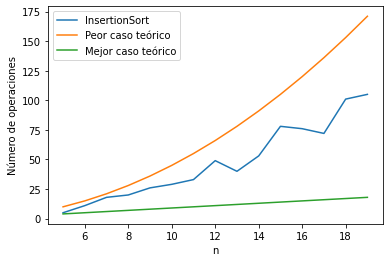

In [4]:
import matplotlib.pyplot as plt
x = [n for n in range(5, 20)]
y1 = [n*(n-1)/2 for n in range(5, 20)]
y2 = [n-1 for n in range(5, 20)]
y = []

for n in range(5, 20):
  a = random.sample(range(1, 100), n)
  a, c = insertionSort(a)
  y.append(c)

plt.plot(x, y)
plt.plot(x, y1) 
plt.plot(x, y2)
plt.legend(["InsertionSort", "Peor caso teórico", "Mejor caso teórico"])

plt.xlabel("n")
plt.ylabel("Número de operaciones")
plt.show()

### Análisis 

Se puede notar que el caso experimental se encuentra acotado por el peor caso teórico por arriba y por el mejor caso teórico por abajo.

## 4.2. Arreglo casi ordenado

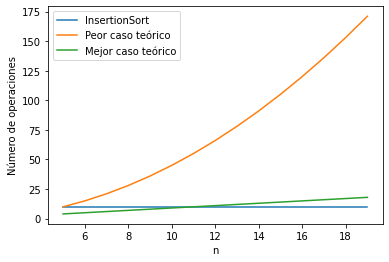

In [5]:
x = [n for n in range(5, 20)]
y1 = [n*(n-1)/2 for n in range(5, 20)]
y2 = [n-1 for n in range(5, 20)]
y = []

for n in range(5, 20):
  a = [1, 2, 3, 4, 5, 6, 7, 9, 8, 10]
  a, c = insertionSort(a)
  y.append(c)

plt.plot(x, y)
plt.plot(x, y1) 
plt.plot(x, y2)
plt.legend(["InsertionSort", "Peor caso teórico", "Mejor caso teórico"])

plt.xlabel("n")
plt.ylabel("Número de operaciones")
plt.show()

## 4.3. Comparación con BubbleSort

In [15]:
import random
from termcolor import colored
import copy

def bubble_sort(a, verbose=False):
    n = len(a)
    T = 0 #contador de comparaciones

    if verbose == True: print("input array:",a)

    for i in range(1,n+1):
        if verbose == True: print("\nPasada",i)
        # Flag que indica si el arreglo ya se encuentra ordenado
        already_sorted = True

        # Se recorre el arreglo
        for j in range(n - i):
            T += 1
            if a[j] > a[j + 1]:
                # Si el elemento es mayor al siguiente se intercambia
                a[j], a[j + 1] = a[j + 1], a[j]
                if verbose == True: 
                  print(str(a[:j])[1:-1],",",colored(f"{str(a[j:j+2])[1:-1]}","red"),",",str(a[j+2:])[1:-1])

                already_sorted = False

        if already_sorted == False and verbose == True: 
           print("\nAl finalizar pasada:")
           print(str(a[:n-i])[1:-1],",",colored(f"{str(a[n-i:])[1:-1]}","blue"))

        if already_sorted:
            if verbose == True: print("is sorted!")
            break

    if verbose == True: print("\noutput array:",a)

    return a, T

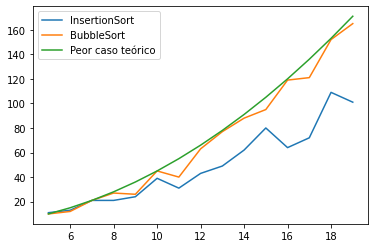

In [36]:
x = [n for n in range(5, 20)]
y = [n*(n-1)/2 for n in range(5, 20)]
y1 = []
y2 = []

for n in range(5, 20):
  a1 = random.sample(range(1, 100), n)
  a2 = random.sample(range(1, 100), n)
  a1, c1 = insertionSort(a1)
  a2, c2 = bubble_sort(a2)
  y1.append(c1)
  y2.append(c2)

plt.plot(x, y1)
plt.plot(x, y2)
plt.plot(x, y)

plt.legend(["InsertionSort", "BubbleSort", "Peor caso teórico"])
plt.show()

Como se puede ver en el gráfico, **InsertionSort** es normalmente más eficiente que **BubbleSort**, ya que este último se acerca mucho a la curva $y = \frac{x(x-1)}{2}$, complejidad temporal teórica en el peor caso de ambos algoritmos.